In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def draw(x1,x2):
  ln=plt.plot(x1,x2)
def sigmoid(score):
  return 1/(1+np.exp(-score))
def calculate_error(line_parameters, points , y):
  n=points.shape[0]
  p= sigmoid(points*line_parameters)
  cross_entropy=-(1/n)*(np.log(p).T*y + np.log(1-p).T*(1-y))
  return cross_entropy
def gradient_descent(line_parameters, points, y , alpha):
  n=points.shape[0]
  for i in range(2000):
    p=sigmoid(points*line_parameters)
    gradient= points.T*(p-y)*(alpha/n)
    line_parameters = line_parameters - gradient
    
    w1=line_parameters.item(0)
    w2=line_parameters.item(1)
    b=line_parameters.item(2)
    
    x1=np.array([points[:,0].min(), points[:,0].max()])
    x2= -b/w2 + (x1*(-w1/w2))
  draw(x1,x2) 
  

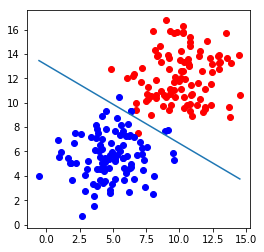

In [7]:
n_pts=100
np.random.seed(0)
bias= np.ones(n_pts)
top_region=np.array([np.random.normal(10,2,n_pts), np.random.normal(12,2,n_pts), bias]).T
bottom_region= np.array([np.random.normal(5,2, n_pts), np.random.normal(6,2, n_pts), bias]).T
all_points=np.vstack((top_region, bottom_region))

line_parameters = np.matrix([np.zeros(3)]).T
# x1=np.array([bottom_region[:,0].min(), top_region[:,0].max()])
# x2= -b/w2 + (x1*(-w1/w2))
y=np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

_, ax= plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1], color='r')
ax.scatter(bottom_region[:,0], bottom_region[:,1], color='b')
gradient_descent(line_parameters, all_points, y , 0.06)
plt.show()